In [1]:
library(tidyverse)
library(wesanderson)
library(ggridges)
library(ggthemes)
library(reshape)
library(lme4)
# library(sjPlot)
source("../../../spydr_scripts/functions/get_os.R")
source("../../../spydr_scripts/functions/median_cl_boot.R")


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘wesanderson’ was built under R version 3.4.4”Warning message:
“package ‘ggridges’ was built under R version 3.4.4”
Attaching package: ‘ggridges’

The following object is masked from ‘package:ggplot2’:

    scale_discrete_manual

Warning message:
“package ‘

In [2]:
os <- get_os()
if (os == 'linux'){home <- '/home/krista/'
} else if(os == 'osx'){home <- '/Users/67981492/'}

agg_data_path = paste0(home,'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/')
setwd(agg_data_path)

In [3]:
#  <- read_csv('clean_df.csv',col_types = cols())
# raw_df <- read_csv('raw_df_processed.csv',col_types = cols())
# epoch_df <- read_csv('epoch_df.csv',col_types = cols())

ls_obs_data <- read_csv("combined_learning_sig_obs_data.csv", col_types=cols())
(n_subjects = length(unique(ls_obs_data$ID)))
(n_conditions = length(unique(ls_obs_data$condition)))
n_clean_trials = 600
ls_obs_data$condition <- factor(ls_obs_data$condition, levels = c('lc', 'hc', 'lv', 'hv'))

Warning message:
“Duplicated column names deduplicated: 'ID' => 'ID_1' [27]”

[1] 24

[1] 4

In [4]:
sum(ls_obs_data$ID_1 == ls_obs_data$ID) == nrow(ls_obs_data)

[1] TRUE

In [5]:
ls_obs_data$ID_1 <- NULL

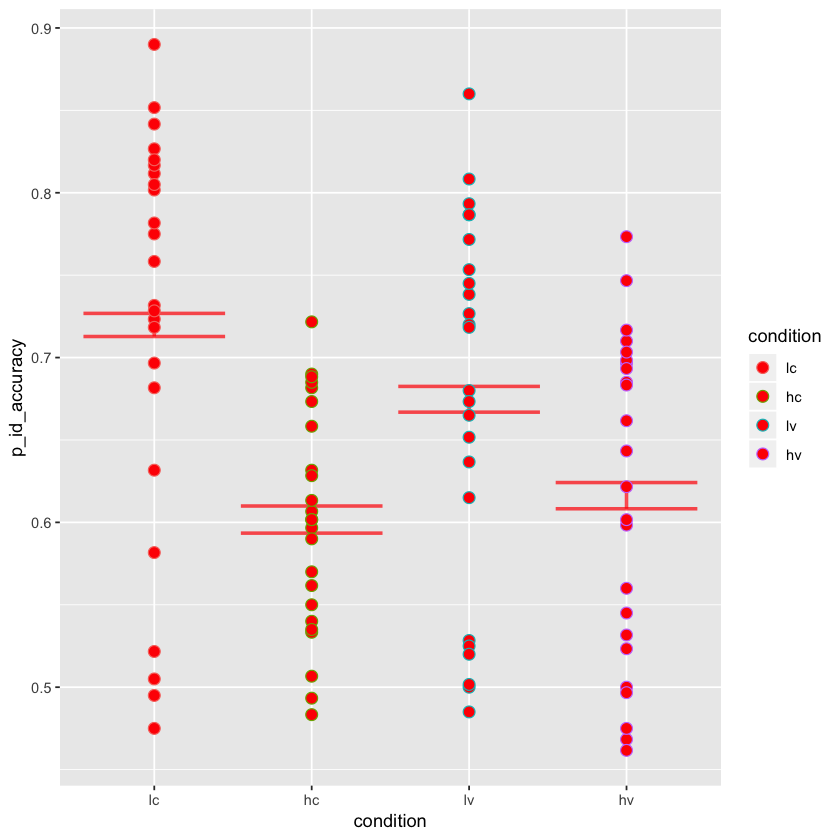

In [6]:
ggplot(ls_obs_data, aes(condition, p_id_accuracy)) +
  stat_summary(fun.data=mean_cl_boot, geom="errorbar", 
               size=1, colour="red", alpha=0.7) +
  stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", fill="red", pch=21, size=3) 

In [7]:
rt_plot <- ggplot(ls_obs_data, aes(y=rt, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", aes(color= condition), size = 1) +
stat_summary(aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Observed Reaction Time (s)') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") + 
coord_cartesian(ylim = c(0.25, 0.45))  

In [8]:
acc_plot <- ggplot(ls_obs_data, aes(y=p_id_accuracy, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", aes(color= condition), size = 1) +
stat_summary(data=ls_obs_data, aes(group=ID, color=condition), fun.y=mean, geom="point", alpha=0.4) +
ylab('Observed Accuracy') + theme_tufte(base_size=22) + 
stat_summary(aes(label=condition, color=condition), fun.y=mean, geom="text", size=6,
             vjust = -1, hjust=-1) +  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),legend.position="none") +
coord_cartesian(ylim = c(0.45, 1))  

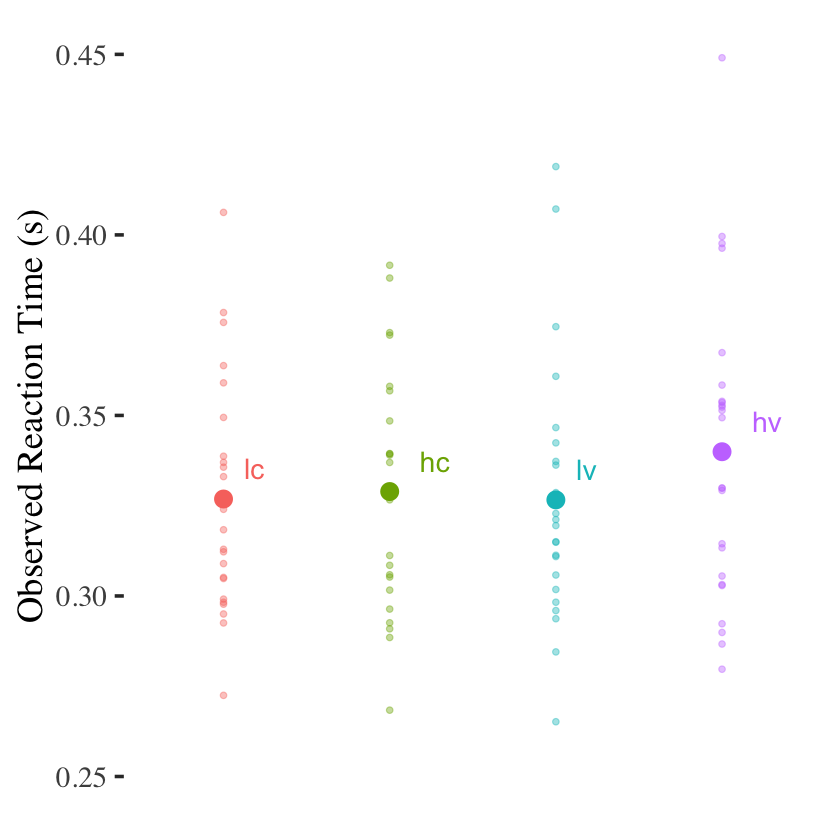

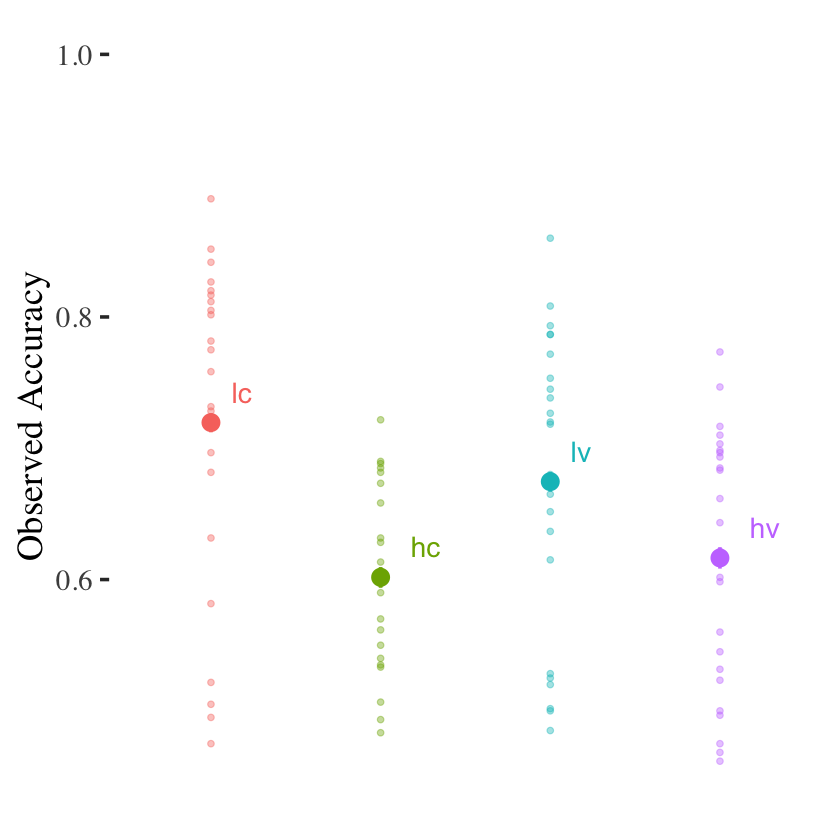

In [9]:
rt_plot
acc_plot

In [10]:
require(nlme)
lme_rt = lme(rt ~ condition, data=ls_obs_data, random = ~1|ID)
anova(lme_rt)

# require(multcomp)
# summary(glht(lme_rt, linfct=mcp(condition = "Tukey")), test = adjusted(type = "bonferroni"))


Loading required package: nlme

Attaching package: ‘nlme’

The following object is masked from ‘package:lme4’:

    lmList

The following object is masked from ‘package:dplyr’:

    collapse



,numDF,denDF,F-value,p-value
(Intercept),1,57573,3127.94568,0
condition,3,57573,54.16725,0


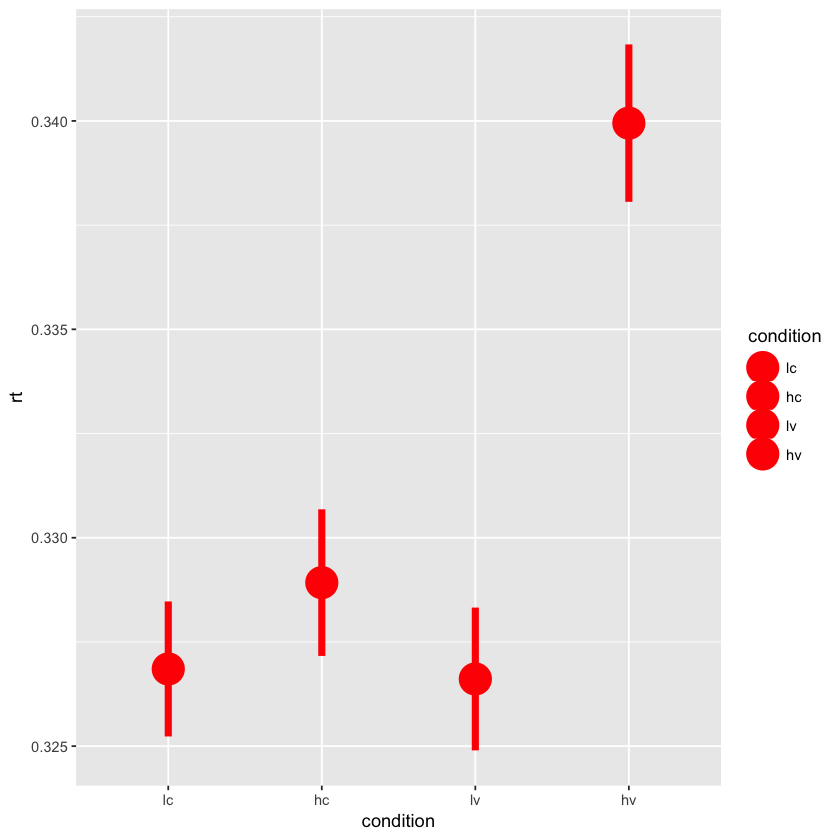

In [11]:
ggplot(ls_obs_data, aes(y=rt, x=condition, fill=condition)) + stat_summary(fun.data = "mean_cl_normal", colour = "red", size = 2)

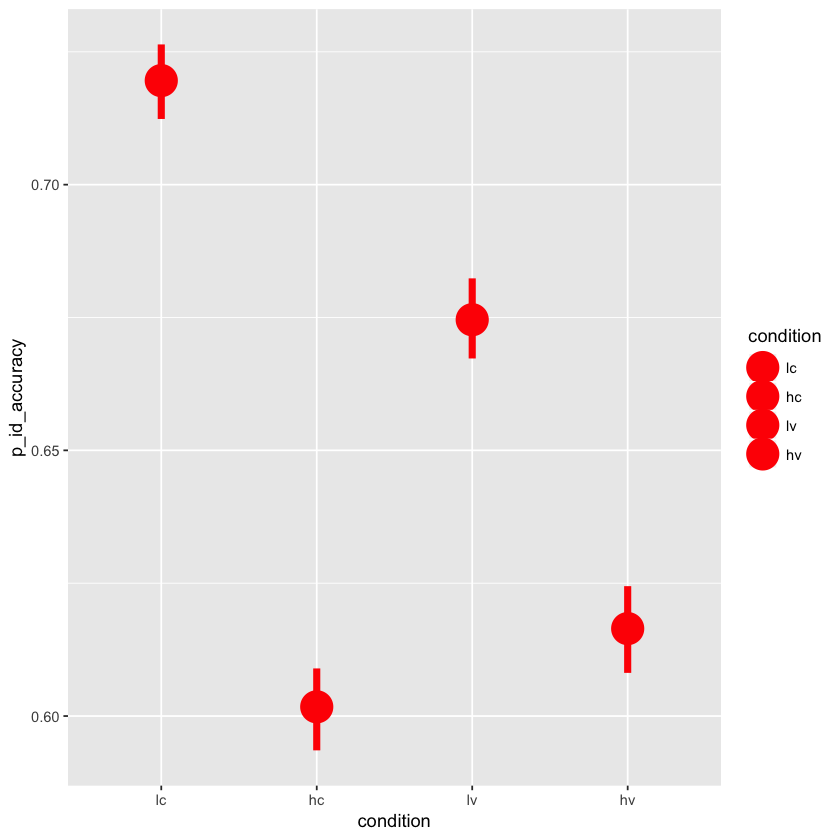

In [12]:
ggplot(ls_obs_data, aes(y=p_id_accuracy, x=condition, fill=condition)) + 
stat_summary(fun.data = "mean_cl_boot", colour = "red", size = 2)

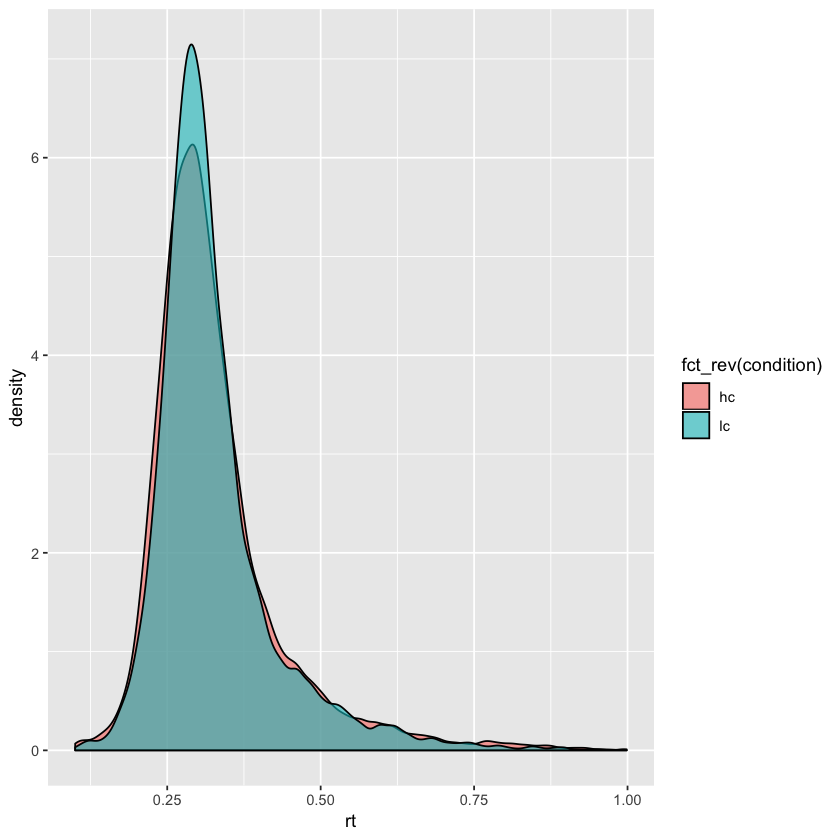

In [13]:
ggplot(subset(ls_obs_data, condition == 'lc' | condition == 'hc'), aes(rt, fill=fct_rev(condition))) + geom_density(alpha=0.6) 

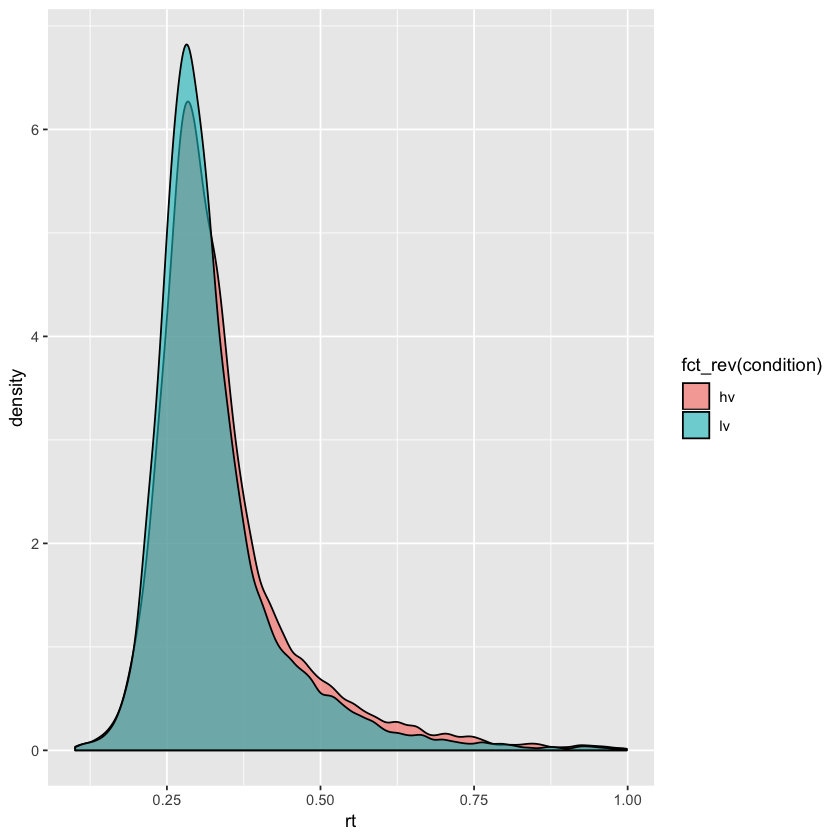

In [14]:
ggplot(subset(ls_obs_data, condition == 'lv' | condition == 'hv'), aes(rt, fill=fct_rev(condition))) + geom_density(alpha=0.6) 

In [15]:
head(ls_obs_data)
#names(ls_obs_data)

cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,⋯,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0.09947117,0.0000000,0.0000000,1,0.01357246,0.4164061,761,0.0000000,0.0000000,2.528877,⋯,0,1,0,1,0.3055556,36,111,111,111,1
0.03507879,0.0000000,0.0000000,0,0.01357246,0.5994712,761,1.3902137,0.1492068,0.000000,⋯,1,2,1,2,0.3055556,36,111,112,112,0
0.02307522,-1.2410069,1.2410069,0,0.01357246,0.5350788,761,0.7923717,0.1965910,0.000000,⋯,2,3,2,3,0.3055556,36,111,112,111,1
0.01988090,-0.5957808,0.5957808,0,-1.00000000,0.5230752,761,0.5328022,0.2266674,0.000000,⋯,3,4,3,4,0.3055556,36,111,112,112,0
0.01853869,-0.3061348,0.3061348,0,-1.00000000,0.5198809,761,0.3913762,0.2519824,0.000000,⋯,4,5,4,5,0.3055556,36,111,112,111,1
0.26853762,-0.1393938,0.1393938,0,-1.00000000,0.5185387,761,0.3028040,0.2751190,3.036967,⋯,5,6,5,6,0.3055556,36,111,111,111,1


In [16]:
range(ls_obs_data$ideal_B); range(ls_obs_data$gen_drift); range(ls_obs_data$gen_bound)

[1] -5.113855  5.864852

[1] -1  1

[1] 0.2277476 1.4999416

In [17]:
sum(ls_obs_data$cpp > 1 |ls_obs_data$cpp < 0 )

[1] 0

In [18]:
#check calculated prop. 
sum(ls_obs_data$prop_112 > 1 | ls_obs_data$prop_112 < 0)

[1] 0

In [19]:
#use vectors of generative conflict and volatility parameters as predictors 
high_conflict_p = 0.65
mod_conflict_p = 0.75
low_conflict_p = 0.85

high_vol_lambda = 15
mod_vol_lambda = 25
low_vol_lambda = 35 

#generative conflict
ls_obs_data[ls_obs_data$condition == 'hc', 'reward_p'] = high_conflict_p
ls_obs_data[ls_obs_data$condition == 'lc', 'reward_p'] = low_conflict_p
ls_obs_data[ls_obs_data$condition == 'hv', 'reward_p'] = mod_conflict_p
ls_obs_data[ls_obs_data$condition == 'lv', 'reward_p'] = mod_conflict_p

#generative volatility
ls_obs_data[ls_obs_data$condition == 'hv', 'lambda'] = high_vol_lambda
ls_obs_data[ls_obs_data$condition == 'lv', 'lambda'] = low_vol_lambda
ls_obs_data[ls_obs_data$condition == 'hc', 'lambda'] = mod_vol_lambda
ls_obs_data[ls_obs_data$condition == 'lc', 'lambda'] = mod_vol_lambda

In [20]:
#use vectors of observed conflict and volatility parameters as predictors 
ls_obs_data$obs_lambda <- ls_obs_data$n_epoch_trials
#probability of reward for high-value target 
ls_obs_data$obs_reward_p <-  if_else(ls_obs_data$prop_112 < 0.5, 1-ls_obs_data$prop_112, ls_obs_data$prop_112)

In [21]:
names(ls_obs_data)

[1] "cpp"                          "target_B"                    
 [3] "choice_B"                     "cp"                          
 [5] "gen_drift"                    "gen_bound"                   
 [7] "ID"                           "b_t0"                        
 [9] "b_t1"                         "r_t1"                        
[11] "r_t2"                         "obs_cp"                      
[13] "ideal_B"                      "B_ideal_target"              
[15] "B_nonideal_target"            "LR_choice"                   
[17] "obs_LR_accuracy"              "obs_LR_solution"             
[19] "reward"                       "cumulative_reward"           
[21] "rt"                           "total_trial_time"            
[23] "iti"                          "cp_with_slow_fast"           
[25] "obs_cp_with_slow_fast"        "obs_high_val_cue"            
[27] "condition"                    "coded_condition"             
[29] "original_trial"               "epoch_n"                     
[31] "epoch_trial"                  "shifted_epoch_trial"         
[33] "max_epoch_n"                  "epoch_trial_zero_idx"        
[35] "epoch_trial_one_idx"          "shifted_epoch_trial_zero_idx"
[37] "repeat_trial"                 "prop_112"                    
[39] "n_epoch_trials"               "p_id_solution"               
[41] "obs_low_val_cue"              "id_choice"                   
[43] "p_id_accuracy"                "reward_p"                    
[45] "lambda"                       "obs_lambda"                  
[47] "obs_reward_p"

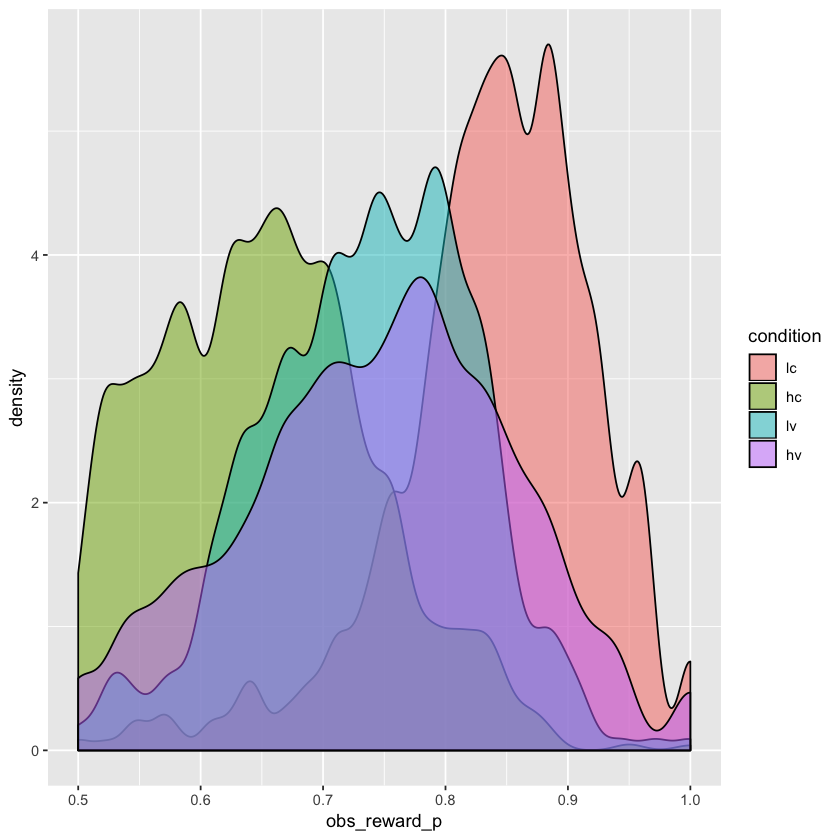

In [22]:
ggplot(ls_obs_data, aes(obs_reward_p, fill=condition)) + geom_density(alpha=0.5)

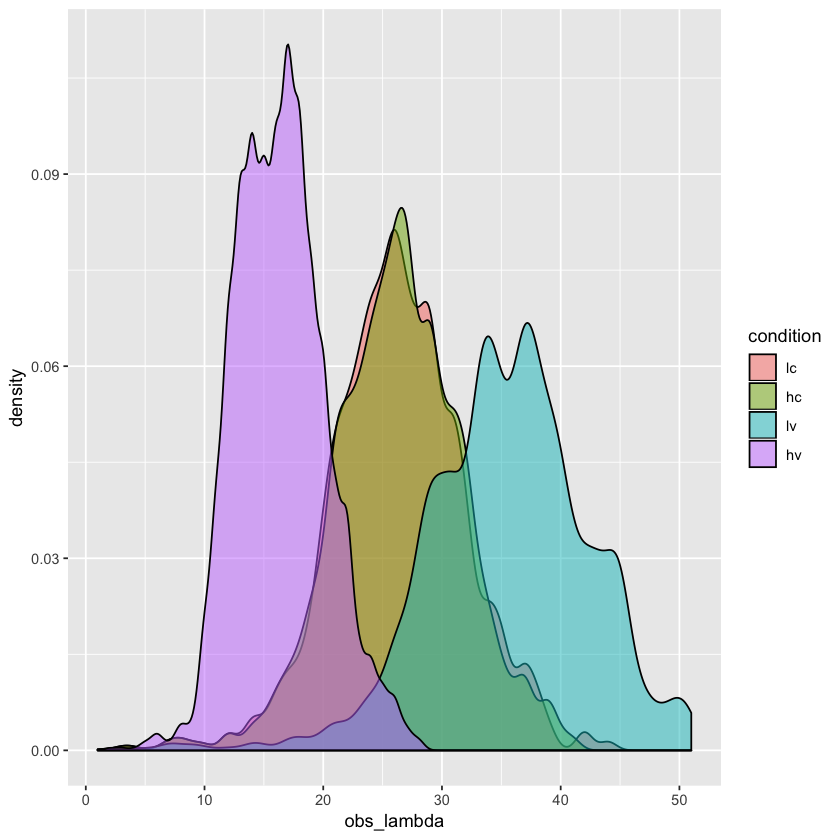

In [23]:
ggplot(ls_obs_data, aes(obs_lambda, fill=condition)) + geom_density(alpha=0.5)

In [24]:
library(popbio)
logi.hist.plot(ls_obs_data$obs_reward_p,ls_obs_data$p_id_accuracy,boxp=FALSE,type="hist",col='gray')

ERROR: Error in library(popbio): there is no package called ‘popbio’


In [25]:
#check for equal n
table(ls_obs_data$ID, ls_obs_data$condition)

table(ls_obs_data$lambda)
table(ls_obs_data$reward_p)

     
       lc  hc  lv  hv
  761 600 600 600 600
  762 600 600 600 600
  763 600 600 600 600
  764 600 600 600 600
  765 600 600 600 600
  766 600 600 600 600
  767 600 600 600 600
  768 600 600 600 600
  769 600 600 600 600
  770 600 600 600 600
  771 600 600 600 600
  772 600 600 600 600
  773 600 600 600 600
  774 600 600 600 600
  775 600 600 600 600
  776 600 600 600 600
  777 600 600 600 600
  778 600 600 600 600
  779 600 600 600 600
  780 600 600 600 600
  781 600 600 600 600
  782 600 600 600 600
  783 600 600 600 600
  784 600 600 600 600


   15    25    35 
14400 28800 14400 


 0.65  0.75  0.85 
14400 28800 14400 

In [26]:
# ls_obs_data[ls_obs_data$condition == 'hc', 'conflict'] = 'high'
# ls_obs_data[ls_obs_data$condition == 'lc', 'conflict'] = 'low'
# ls_obs_data[ls_obs_data$condition == 'hc', 'vol'] = 'mod'
# ls_obs_data[ls_obs_data$condition == 'lc', 'vol'] = 'mod'

# ls_obs_data[ls_obs_data$condition == 'hv', 'vol'] = 'high'
# ls_obs_data[ls_obs_data$condition == 'lv', 'vol'] = 'low'
# ls_obs_data[ls_obs_data$condition == 'hv', 'conflict'] = 'mod'
# ls_obs_data[ls_obs_data$condition == 'lv', 'conflict'] = 'mod'

In [27]:
head(ls_obs_data$condition)


ls_obs_data$cpp_scaled = scale(ls_obs_data$cpp)
ls_obs_data$ideal_B_scaled = scale(ls_obs_data$ideal_B)
ls_obs_data$lambda_scaled = scale(ls_obs_data$lambda )
ls_obs_data$reward_p_scaled = scale(ls_obs_data$reward_p  )

ls_obs_data$obs_lambda_scaled = scale(ls_obs_data$obs_lambda  )

ls_obs_data$obs_reward_p_scaled = scale(ls_obs_data$obs_reward_p  )

ls_obs_data$log_rt <- log(ls_obs_data$rt)

# ls_obs_data$conflict <- as.factor(ls_obs_data$conflict)
# ls_obs_data$vol <- as.factor(ls_obs_data$vol)

# #create two distinct dfs
# conflict_df <- subset(ls_obs_data, condition == 'hc' | condition == 'lc')
# vol_df <- subset(ls_obs_data, condition == 'hv' | condition == 'lv')

[1] hc hc hc hc hc hc
Levels: lc hc lv hv

In [28]:
ls_obs_data_cor <- cor(ls_obs_data[,c("cpp","target_B",
                                             "choice_B", "ideal_B", "rt", 
                                             "gen_drift", "gen_bound", "epoch_trial", "reward_p", 'lambda' )])

In [29]:
library(corrplot)
corrplot(ls_obs_data_cor, method="number", type="upper", order="hclust")

ERROR: Error in library(corrplot): there is no package called ‘corrplot’


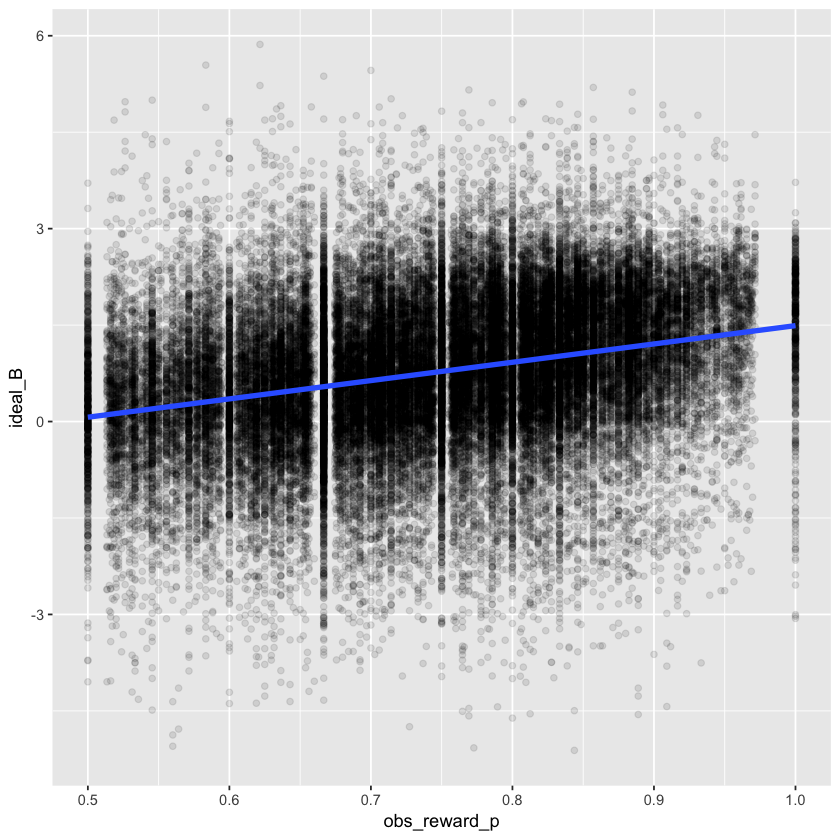

In [30]:
ggplot(ls_obs_data, aes(obs_reward_p, ideal_B)) + geom_point(alpha=0.1) + geom_smooth(method='lm', aes(), size=1.5)

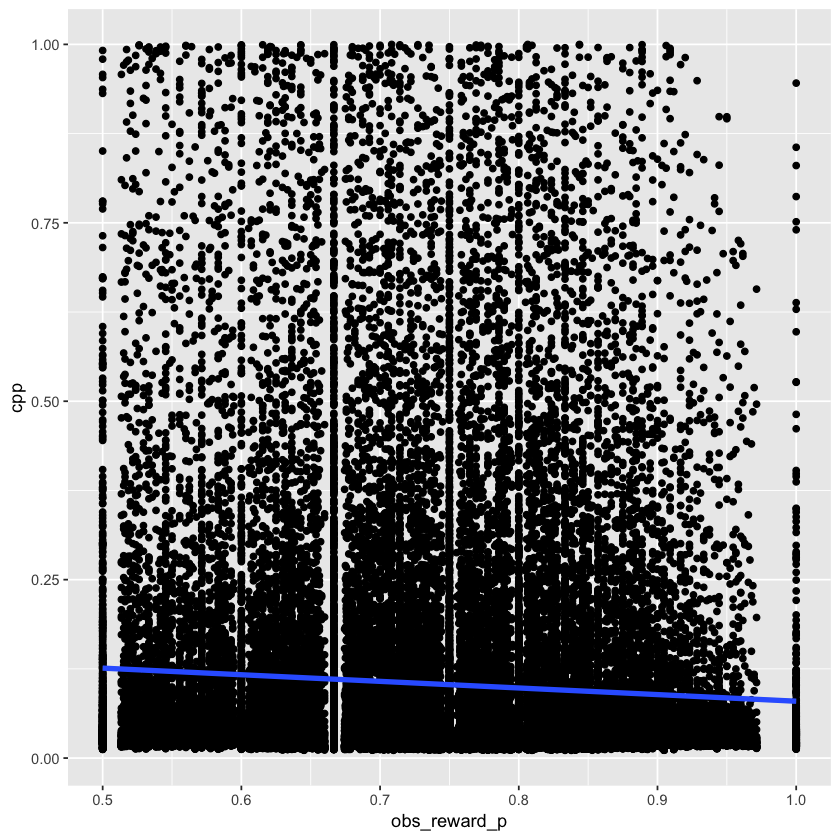

In [31]:
ggplot(ls_obs_data, aes(obs_reward_p, cpp)) + geom_point()+ geom_smooth(method='lm', aes(), size=1.5) 

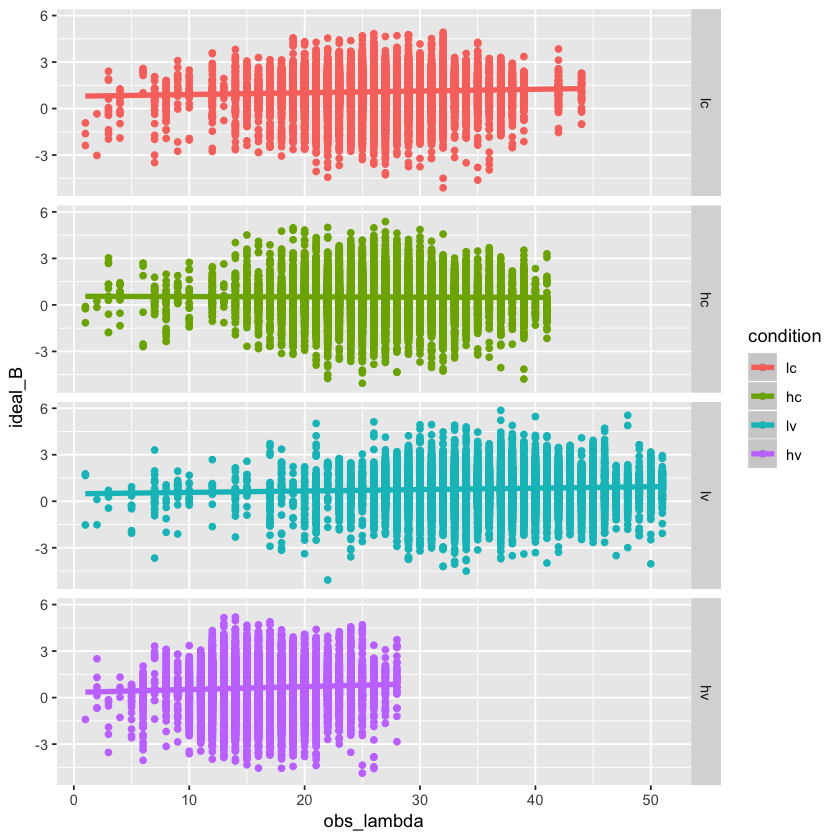

In [32]:
ggplot(ls_obs_data, aes(obs_lambda, ideal_B, col = condition)) + geom_point() + geom_smooth(method='lm', aes(), size=1.5) + facet_grid(condition ~.)

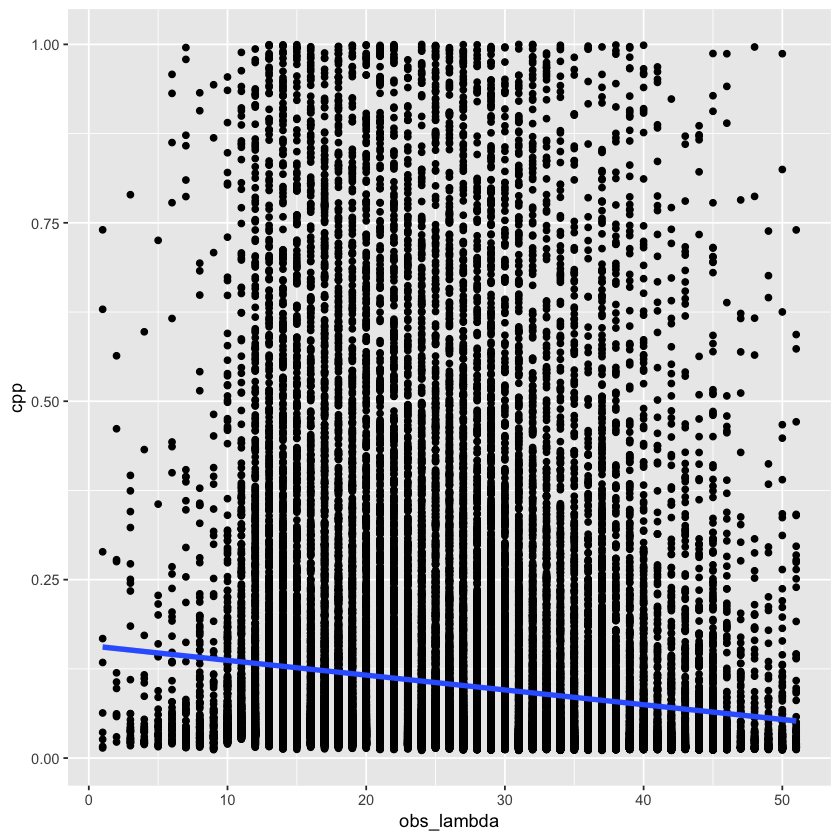

In [33]:
ggplot(ls_obs_data, aes(obs_lambda, cpp)) + geom_point() +  geom_smooth(method='lm', aes(), size=1.5) 

# Are learning signals correlated? 

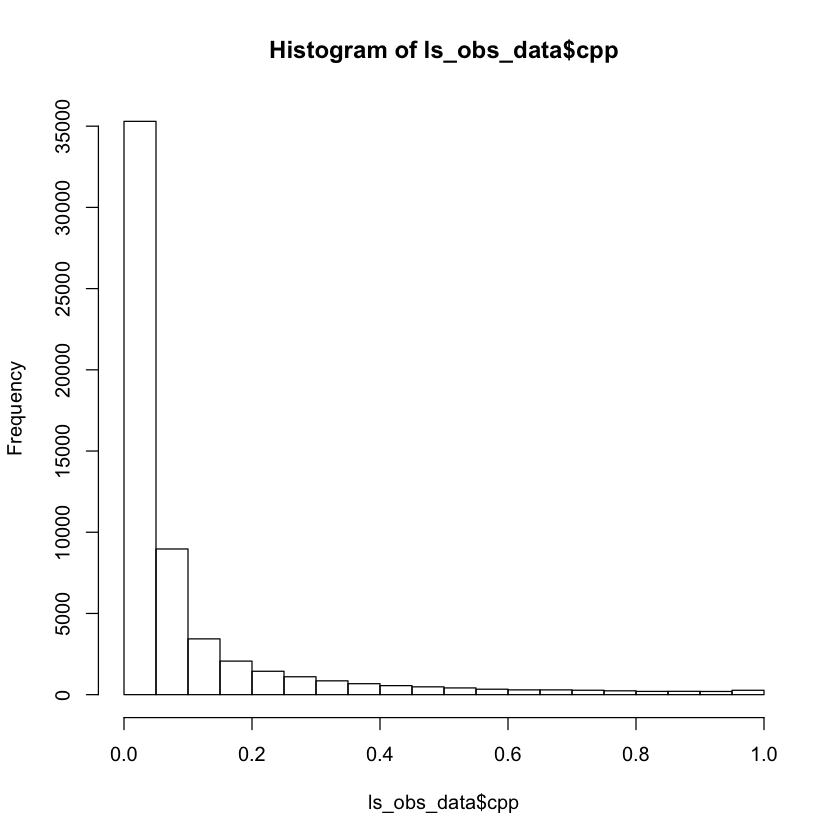

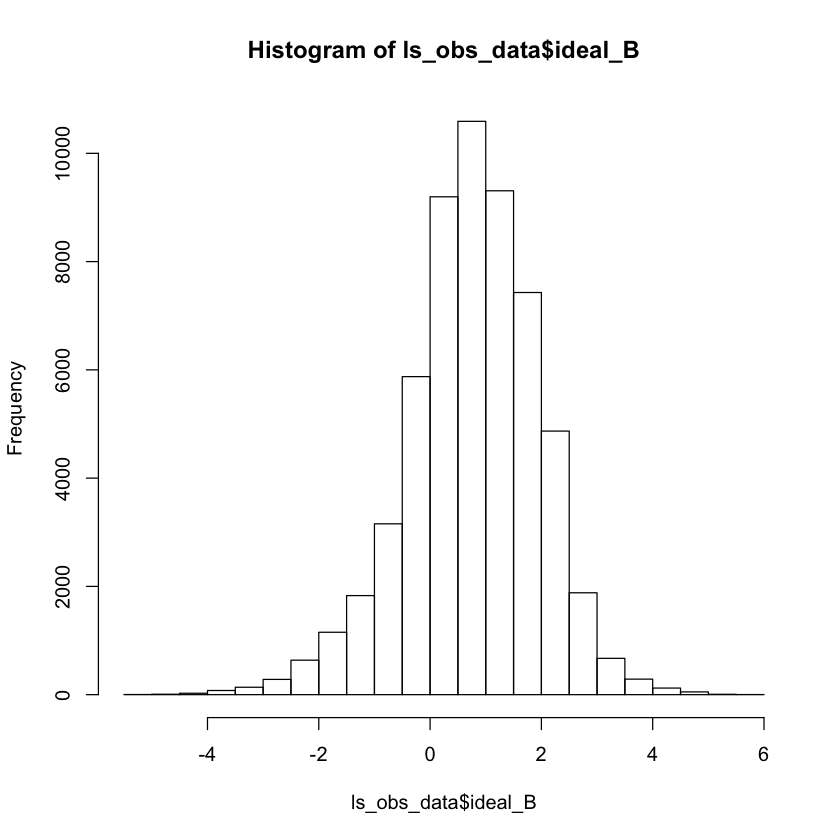

In [34]:
#test for correlation 
#if both have normal dist, use pearson 
#if not, use spearman
hist(ls_obs_data$cpp); hist(ls_obs_data$ideal_B)

## cpp & ideal_B have a weak but significant negative correlation, -0.15


In [35]:
#cpp & ideal_B have a weak but significant negative correlation, -0.15
cor.test(ls_obs_data$ideal_B, ls_obs_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$ideal_B and ls_obs_data$cpp
S = 3.6653e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.1507721 


In [36]:
cor.test(ls_obs_data$lambda, ls_obs_data$cpp, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$lambda and ls_obs_data$cpp
S = 4.3098e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3531435 


In [37]:
cor.test(ls_obs_data$reward_p, ls_obs_data$ideal_B, method='spearman', exact=FALSE)


	Spearman's rank correlation rho

data:  ls_obs_data$reward_p and ls_obs_data$ideal_B
S = 2.5533e+13, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.1983328 


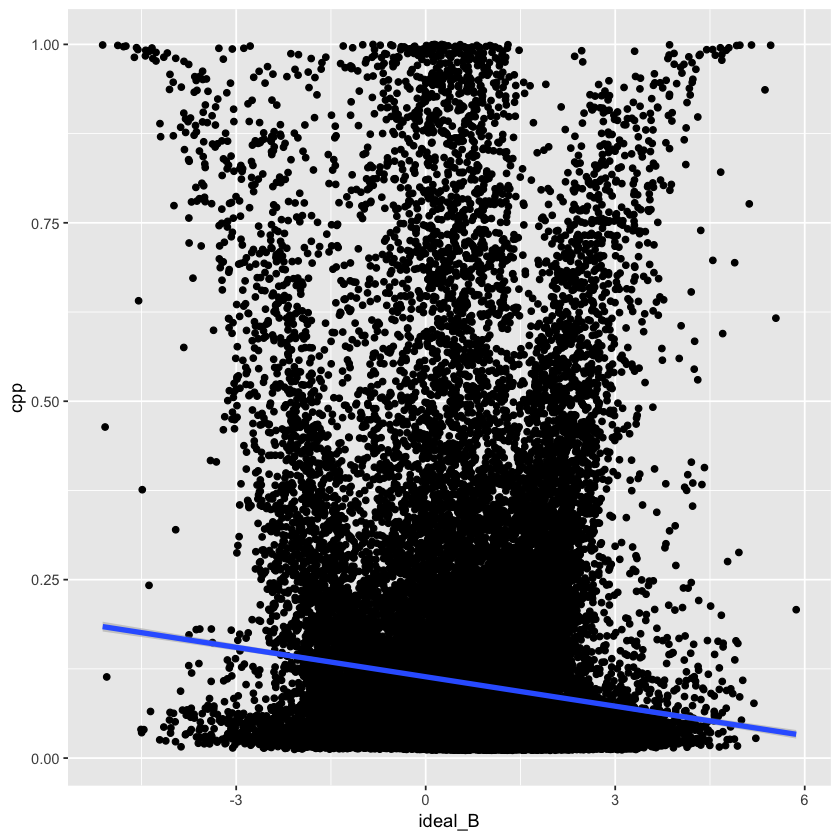

In [38]:
ggplot(ls_obs_data, aes(ideal_B, cpp)) + geom_point() +  geom_smooth(method='lm', aes(), size=1.5) 

# Predictors
### Ideal observer learning signals 
### * change point probability, $\Omega$
### * belief in the difference of the reward value of the most rewarding target and the suboptimal target, $B_\Delta$
# Outcomes 
### Reaction time 
### Binary accuracy

# Statistical models 

### $\hat{Y}_{rt} = \beta_0 + \beta_{B_\Delta}B_\Delta+ \beta_{\Omega}\Omega + \beta_{B_\Delta\Omega}B_{\Delta}\Omega + (1  | {\ ID}) + \epsilon$

 
 ****
 ### $\hat{Y}_{acc} = \beta_0 + \beta_{B_\Delta}B_\Delta+ \beta_{\Omega}\Omega + \beta_{B_\Delta\Omega}B_{\Delta}\Omega + (1  | {\ ID}) + \epsilon$



In [39]:
ls_rt <- lmer(log_rt ~ ideal_B*cpp +  (1| ID), ls_obs_data, control=lmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [40]:
ls_rt_ci = confint(ls_rt)

Computing profile confidence intervals ...


In [41]:
#belief covaries with rt. 
print(ls_rt_ci)

                   2.5 %        97.5 %
.sig01       0.061533091  0.1091971348
.sigma       0.269520212  0.2726517026
(Intercept) -1.181895547 -1.1150758614
ideal_B     -0.004965319 -0.0003043238
cpp         -0.004100906  0.0239827733
ideal_B:cpp -0.011740906  0.0035984258


In [42]:
ls_acc <- glmer(p_id_accuracy ~ ideal_B*cpp + (1 | ID),  family = 'binomial', ls_obs_data, control=glmerControl(optimizer="bobyqa", optCtrl=list(maxfun=100000)))

In [43]:
ls_acc_ci = confint(ls_acc)

Computing profile confidence intervals ...


In [44]:
print(ls_acc_ci)

                 2.5 %      97.5 %
.sig01       0.3155618  0.56243758
(Intercept)  0.1169468  0.46265410
ideal_B      0.5541353  0.59544690
cpp         -0.1781140  0.04629702
ideal_B:cpp -0.3006749 -0.16535984


In [ ]:
library(hexbin)
d <- ggplot(probs_df, aes(ideal_B, probs))
d + geom_hex()

In [ ]:
exp(-0.004965319); exp(-0.0003043238)

In [ ]:
(1-.99) * 1000

In [ ]:
exp(-0.004965319)

In [ ]:
(1-exp(-0.004965319))*1000

In [ ]:
(1-0.995046987818867 )*1000

In [ ]:
exp(fixef(ls_rt))

In [ ]:
plot(ls_obs_data$rt[], ls_obs_data$ideal_B, lm)

In [ ]:
summary(ls_acc)
confint(ls_acc)

In [ ]:
exp(fixef(ls_acc))

In [ ]:
plot(ls_rt)

In [ ]:
#when ideal_B increases, effect of cpp on accuracy decreases 
#know that cpp decreases as ideal_B increases  
exp(fixef(ls_acc))

In [ ]:
acc_pred <- predict(ls_acc,type='response') #b0 + b1x1 + b2x2 ...
acc_probs <- exp(acc_pred)/(1+exp(acc_pred)) #probability that y=1 for each observation

In [ ]:
acc_probs_df <- data.frame(acc_probs, ideal_B, cpp)

In [ ]:
ggplot(acc_probs_df, aes(acc_probs, ideal_B)) + geom_point()

In [ ]:
ggplot(acc_probs_df, aes(ideal_B, acc_probs, color=cpp)) + geom_point() + 

In [ ]:
library(scatterplot3d)
attach(ls_obs_data)
scatterplot3d(cpp,ideal_B,probs, main="interaction effect of ideal_B:CPP on p(accuracy)")

In [ ]:
par(mfrow = c(1, 3))

# Intercorrelation pred1/pred2
plot(ideal_B ~ cpp, ls_obs_data)
lines(lowess(ls_obs_data$ideal_B, ls_obs_data$cpp), col = "red")

# Pred1 vs. outcome
plot(p_id_accuracy ~ ideal_B, ls_obs_data)
lines(lowess(df$pred1, df$outcome), col = "red")

# Pred2 vs. outcome
plot(p_id_accuracy ~ cpp, ls_obs_data)
lines(lowess(df$pred2, ls_obs_data$outcome), col = "red")

In [ ]:
library(boot)
set.seed(081318)
log_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- glmer(formula, data=d, family = binomial, control = glmerControl(optimizer = "bobyqa"),
    nAGQ = 10)
  return(fixef(fit))
} 

ls_acc_formula <- p_id_accuracy ~ ideal_B*cpp + (1 | ID)

# bootstrapping with 1000 replications 
ls_log_boot_results <- boot(formula=ls_acc_formula, data=ls_obs_data, 
  	R=1000, statistic=log_coef)


In [ ]:
boot.ci(ls_log_boot_results, type='perc')

In [ ]:
lm_coef <- function(formula, data, indices) {
  d <- data[indices,] # allows boot to select sample 
  fit <- lmer(formula, data=d)
  return(fixef(fit))
} 

ls_rt_formula = log_rt ~ ideal_B*cpp +  (1| ID)

ls_lm_boot_results <- boot(formula=ls_rt_formula, data=ls_obs_data, 
  	R=1000, statistic=lm_coef)

In [ ]:
# get 95% confidence interval for each coefficient
log_intercept_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=1) # intercept 
log_ideal_B_boot_ci <-boot.ci(ls_log_boot_results, type="perc", index=2) # ideal_B 
log_cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_log_boot_results, type="perc", index=4) # ideal_B*cpp interaction

In [ ]:
# get 95% confidence interval for each coefficient
lm_intercept_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=1) # intercept 
lm_ideal_B_boot_ci <-boot.ci(ls_lm_boot_results, type="perc", index=2) # ideal_B 
lm_cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=3) # cpp
idael_B.cpp_boot_ci <- boot.ci(ls_lm_boot_results, type="perc", index=4) # ideal_B*cpp interaction